In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
d0 = pd.read_csv('mnist/train.csv')

In [34]:
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

In [36]:
labels = [-1 if label % 2 == 0 else 1 for label in l]
data = d

print("the shape of sample data = ", data.shape)

the shape of sample data =  (42000, 784)


In [37]:
from sklearn.preprocessing import StandardScaler
sample_data = StandardScaler().fit_transform(data)
print(sample_data.shape)

(42000, 784)


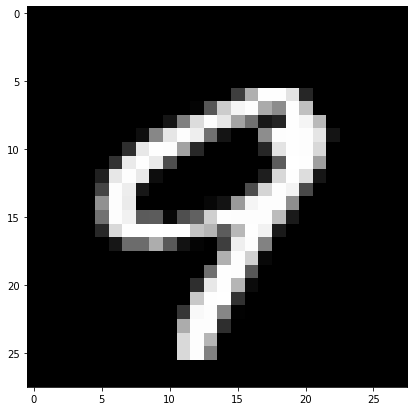

9


In [38]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [39]:
from sklearn import decomposition
pca = decomposition.PCA()

In [40]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 10
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 10)


In [41]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

In [42]:
dataframe = pd.DataFrame(data=pca_data, columns=("1_principal", "2_principal",
                                                 "3_principal", "4_principal",
                                                 "5_principal", "6_principal",
                                                 "7_principal", "8_principal",
                                                 "9_principal", "10_principal",
                                                 "label"))
print(dataframe.head())

   1_principal  2_principal  3_principal  4_principal  5_principal  \
0    -5.140478    -5.226451     3.886993    -0.901512     4.929209   
1    19.292333     6.033014     1.308196    -2.383076     3.095021   
2    -7.644504    -1.705801     2.289336     2.241256     5.094750   
3    -0.474206     5.836146     2.008588     4.271250     2.378019   
4    26.559575     6.024832     0.933257    -3.012613     9.488500   

   6_principal  7_principal  8_principal  9_principal  10_principal  label  
0     2.036187     4.706960    -4.764459     0.238225     -1.459020    1.0  
1    -1.794193    -3.770784     0.148453    -4.154969     -4.295380   -1.0  
2    -4.152694    -1.011677     1.733929     0.422061     -0.072606    1.0  
3     2.179969     4.397159    -0.346711     1.018367      5.470587   -1.0  
4    -2.333748    -6.146737    -1.796978    -4.180035     -5.717939   -1.0  


In [43]:
from pathlib import Path  
filepath = Path('mnist/train_10pca.csv') 
dataframe.to_csv(filepath)